In [1]:
library(ggplot2)
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(tseries)

── Attaching packages ──────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ─────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

Loading required package: viridisLite

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
data <- read.csv("data/sum-airport-month.csv")

In [3]:
data["delay_rate"] <- data$arr_del15 / data$arr_flights
data["new_delay_rate"] <- (data$arr_del15 - data$late_aircraft_ct)/(data$arr_flights - data$late_aircraft_ct)
data["new_arr_flights"] <- (data$arr_flights - data$late_aircraft_ct)

In [4]:
data["jan"] <- as.numeric(data$month==1)
data["feb"] <- as.numeric(data$month==2)
data["mar"] <- as.numeric(data$month==3)
data["apr"] <- as.numeric(data$month==4)
data["may"] <- as.numeric(data$month==5)
data["jun"] <- as.numeric(data$month==6)
data["jul"] <- as.numeric(data$month==7)
data["aug"] <- as.numeric(data$month==8)
data["sep"] <- as.numeric(data$month==9)
data["oct"] <- as.numeric(data$month==10)
data["nov"] <- as.numeric(data$month==11)
data["dec"] <- as.numeric(data$month==12)

In [5]:
sum(data$jan)

[1] 5794

In [6]:
data["arr_flights_n"] = data$arr_flights / max(data$arr_flights)

In [61]:
max(data$arr_flights)

[1] 38241

In [7]:
summary(data$covid)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.08776 0.00000 1.00000 

In [8]:
summary(data$control)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.08577 0.00000 1.00000 

In [9]:
finiteFilter = data$delay_rate > 0 & data$delay_rate < 1

In [10]:
filterTest = finiteFilter & (data$covid + data$control > 0)

In [11]:
newFiniteFilter = data$new_delay_rate > 0 & data$new_delay_rate < 1 & (is.na(data$new_delay_rate) == FALSE)
newFilterTest = newFiniteFilter & (data$covid + data$control > 0)

In [12]:
data["t_delay_rate"] <- log(data$delay_rate / (1-data$delay_rate))

data["t_new_delay_rate"] <- log(data$new_delay_rate / (1-data$new_delay_rate))


In [13]:
qs <- data[data$t_delay_rate > -Inf && data$t_delay_rate < Inf,]$t_delay_rate
data["tc_delay_rate"] <- pmax(pmin(data$t_delay_rate,max(qs)),min(qs))

In [14]:
# fit with all too many variables, use only these with |t-value|>5



Call: rlm(formula = t_delay_rate ~ top30 + covid + arr_flights_n + 
    ATL + ORD + CLT + DEN + DFW + ADK + LAX + ITO + MSP + DTW + 
    PHX + sep + mar + CDB + oct + jul + SEA + LAS + feb + SLC + 
    IAH + jun + extra_tue + EKO + SFO + LIH + BWI + DCA + HIB + 
    BTM + LGA + HNL + MCO + KOA + apr + may + extra_sat + MDW + 
    BOS + PHL + BJI + SAN + extra_thu + JFK + OGG + OTZ + BQN + 
    LWS + SJC + GST + PIH + MIA + DAL + ELM + ABR + BNA + jan, 
    data = data[newFilterTest, ])
Residuals:
     Min       1Q   Median       3Q      Max 
-3.37040 -0.30732  0.01374  0.29996  3.40181 

Coefficients:
              Value     Std. Error t value  
(Intercept)     -1.7557    0.0172  -102.3038
top30           -0.2859    0.0436    -6.5569
covid           -0.6333    0.0096   -65.6835
arr_flights_n    2.6164    0.1359    19.2529
ATL             -1.8447    0.1219   -15.1361
ORD             -1.1552    0.1103   -10.4711
CLT             -1.0001    0.1029    -9.7195
DEN             -0.9715    0.1

[1] "BIC="             "20236.5996896055"
[1] "AIC="             "19779.9304277098"


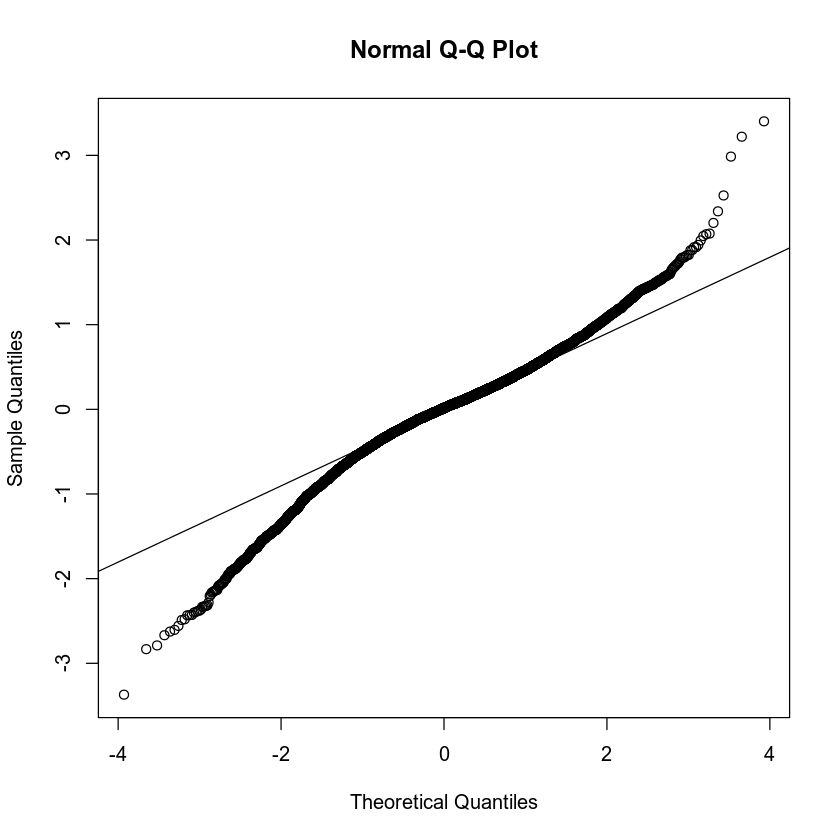

In [56]:
m <- MASS::rlm(t_delay_rate~ top30+covid+arr_flights_n+ATL+ORD+CLT+DEN+DFW+ADK+LAX+ITO+MSP+DTW+PHX+sep+mar+CDB+oct+jul+SEA+LAS+feb+SLC+IAH
               +jun+extra_tue+EKO+SFO+LIH+BWI+DCA+HIB+BTM+LGA+HNL+MCO+KOA+apr+may+extra_sat+MDW+BOS+PHL+BJI+SAN+extra_thu+JFK+OGG+OTZ
               +BQN+LWS+SJC+GST+PIH+MIA+DAL+ELM+ABR+BNA+jan,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


Call: rlm(formula = t_delay_rate ~ covid + arr_flights_n + ATL + ORD + 
    CLT + DEN + DFW + ADK + LAX + ITO + MSP + DTW + PHX + sep + 
    mar + CDB + oct + jul + SEA + LAS + feb + SLC + IAH + jun + 
    extra_tue + EKO + SFO + LIH + BWI + DCA + HIB + BTM + LGA + 
    HNL + MCO + KOA + apr + may + extra_sat + MDW + BOS + PHL + 
    BJI + SAN + extra_thu + JFK + OGG + OTZ + BQN + LWS + SJC + 
    GST + PIH + MIA + DAL + ELM + ABR + BNA + jan, data = data[newFilterTest, 
    ])
Residuals:
     Min       1Q   Median       3Q      Max 
-3.36434 -0.30804  0.01361  0.30108  3.40298 

Coefficients:
              Value     Std. Error t value  
(Intercept)     -1.7508    0.0172  -101.8579
covid           -0.6412    0.0096   -66.7011
arr_flights_n    2.2137    0.1222    18.1115
ATL             -1.8435    0.1221   -15.0927
ORD             -1.2038    0.1101   -10.9301
CLT             -1.1074    0.1017   -10.8887
DEN             -1.0583    0.1051   -10.0721
DFW             -0.9619    0.1106    -

[1] "BIC="             "20266.7415084676"
[1] "AIC="             "19817.4378798283"


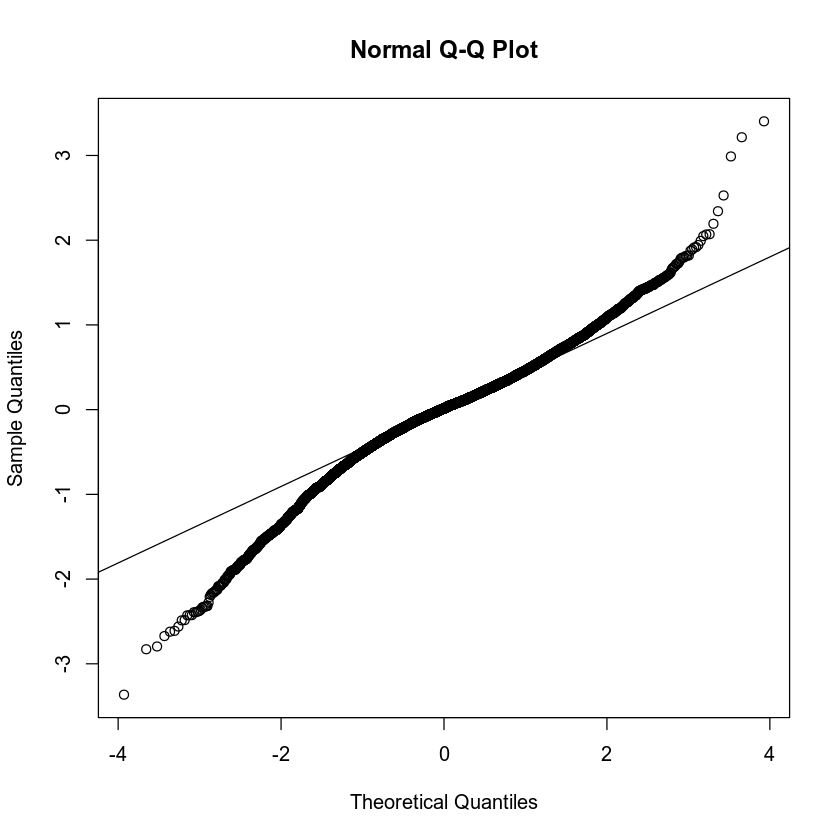

In [20]:
m <- MASS::rlm(t_delay_rate~ covid+arr_flights_n+ATL+ORD+CLT+DEN+DFW+ADK+LAX+ITO+MSP+DTW+PHX+sep+mar+CDB+oct+jul+SEA+LAS+feb+SLC+IAH
               +jun+extra_tue+EKO+SFO+LIH+BWI+DCA+HIB+BTM+LGA+HNL+MCO+KOA+apr+may+extra_sat+MDW+BOS+PHL+BJI+SAN+extra_thu+JFK+OGG+OTZ
               +BQN+LWS+SJC+GST+PIH+MIA+DAL+ELM+ABR+BNA+jan,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))
m1 <- m

In [21]:
write.csv(coef(summary(m)),file="data/airport_x_months_fit1.csv")

 Remove 
SAN
MCO
DAL
PHL
jan
BOS
BNA
JFK
MIA



Call: rlm(formula = t_delay_rate ~ covid + arr_flights_n + ATL + ORD + 
    CLT + DEN + DFW + ADK + LAX + ITO + MSP + DTW + PHX + sep + 
    mar + CDB + oct + jul + SEA + LAS + feb + SLC + IAH + extra_tue + 
    EKO + SFO + LIH + BWI + DCA + HIB + BTM + LGA + HNL + KOA + 
    apr + may + extra_sat + MDW + BJI + extra_thu + OGG + OTZ + 
    BQN + LWS + SJC + GST + PIH + ELM + ABR + jan, data = data[newFilterTest, 
    ])
Residuals:
     Min       1Q   Median       3Q      Max 
-3.31719 -0.30709  0.01281  0.30815  3.40225 

Coefficients:
              Value     Std. Error t value  
(Intercept)     -1.6700    0.0165  -100.9255
covid           -0.6610    0.0097   -68.2868
arr_flights_n    1.5323    0.1017    15.0633
ATL             -1.3553    0.1132   -11.9688
ORD             -0.8081    0.1044    -7.7394
CLT             -0.8046    0.0984    -8.1794
DEN             -0.7238    0.1008    -7.1829
DFW             -0.5703    0.1048    -5.4435
ADK              1.6236    0.1124    14.4430
LAX    

[1] "BIC="            "20417.108220453"
[1] "AIC="             "20034.0952911211"


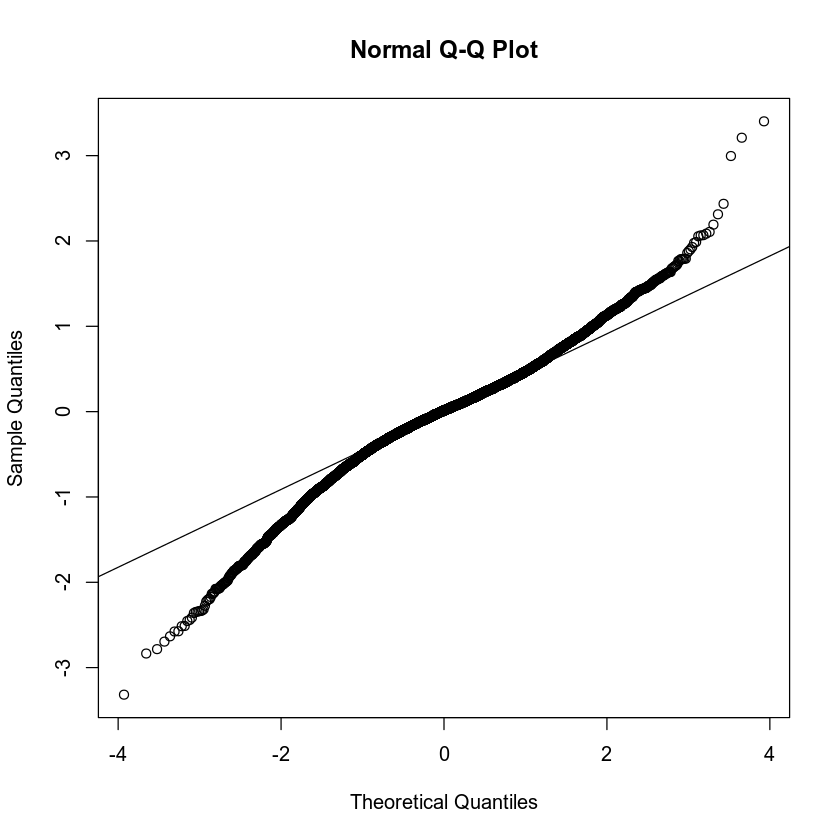

In [22]:
m <- MASS::rlm(t_delay_rate~ covid+arr_flights_n+ATL+ORD+CLT+DEN+DFW+ADK+LAX+ITO+MSP+DTW+PHX+sep+mar+CDB+oct+jul+SEA+LAS+feb+SLC+IAH
               +extra_tue+EKO+SFO+LIH+BWI+DCA+HIB+BTM+LGA+HNL+KOA+apr+may+extra_sat+MDW+BJI+extra_thu+OGG+OTZ
               +BQN+LWS+SJC+GST+PIH+ELM+ABR+jan,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))
m2 <- m

In [23]:
write.csv(coef(summary(m)),file="data/airport_x_months_fit2.csv")

In [24]:
#remove GST, MDW, DCA, SJC, IAH, SFO, LGA


Call: rlm(formula = t_delay_rate ~ covid + arr_flights_n + ATL + ORD + 
    CLT + DEN + DFW + ADK + LAX + ITO + MSP + DTW + PHX + sep + 
    mar + CDB + oct + jul + SEA + LAS + feb + SLC + extra_tue + 
    EKO + LIH + BWI + HIB + BTM + HNL + KOA + apr + may + extra_sat + 
    BJI + extra_thu + OGG + OTZ + BQN + LWS + PIH + ELM + ABR + 
    jan, data = data[newFilterTest, ])
Residuals:
     Min       1Q   Median       3Q      Max 
-3.31243 -0.30906  0.01373  0.30901  3.40234 

Coefficients:
              Value     Std. Error t value  
(Intercept)     -1.6639    0.0166  -100.3588
covid           -0.6688    0.0097   -69.1127
arr_flights_n    1.1209    0.0884    12.6846
ATL             -1.0634    0.1077    -9.8696
ORD             -0.5706    0.1008    -5.6588
CLT             -0.6238    0.0962    -6.4854
DEN             -0.5220    0.0980    -5.3253
DFW             -0.3374    0.1011    -3.3363
ADK              1.6226    0.1128    14.3819
LAX             -0.4926    0.0941    -5.2338
ITO      

[1] "BIC="             "20445.0824045357"
[1] "AIC="             "20113.6289079985"


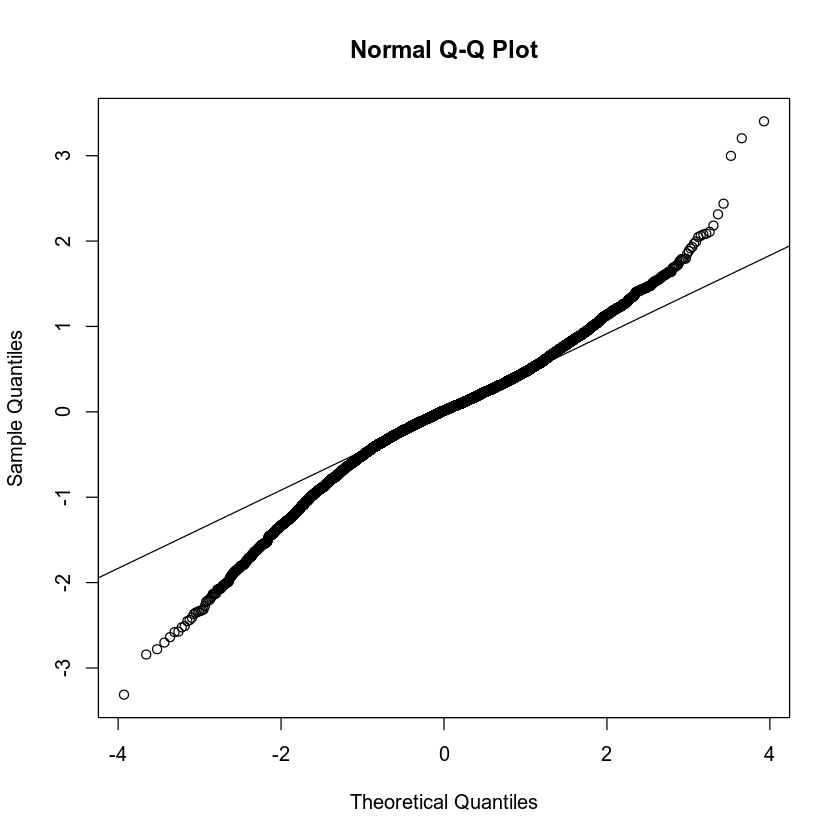

In [25]:
m <- MASS::rlm(t_delay_rate~ covid+arr_flights_n+ATL+ORD+CLT+DEN+DFW+ADK+LAX+ITO+MSP+DTW+PHX+sep+mar+CDB+oct+jul+SEA+LAS+feb+SLC
               +extra_tue+EKO+LIH+BWI+HIB+BTM+HNL+KOA+apr+may+extra_sat+BJI+extra_thu+OGG+OTZ
               +BQN+LWS+PIH+ELM+ABR+jan,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))
m3 <- m

In [26]:
write.csv(coef(summary(m)),file="data/airport_x_months_fit3.csv")

In [27]:
# SLC, BWI, SEA, LAS, DFW


Call: rlm(formula = t_delay_rate ~ covid + arr_flights_n + ATL + ORD + 
    CLT + DEN + ADK + LAX + ITO + MSP + DTW + PHX + sep + mar + 
    CDB + oct + jul + feb + extra_tue + EKO + LIH + HIB + BTM + 
    HNL + KOA + apr + may + extra_sat + BJI + extra_thu + OGG + 
    OTZ + BQN + LWS + PIH + ELM + ABR + jan, data = data[newFilterTest, 
    ])
Residuals:
     Min       1Q   Median       3Q      Max 
-3.30928 -0.31041  0.01436  0.31160  3.39990 

Coefficients:
              Value    Std. Error t value 
(Intercept)    -1.6568   0.0166   -99.7358
covid          -0.6760   0.0097   -69.8098
arr_flights_n   0.7778   0.0723    10.7620
ATL            -0.8217   0.1020    -8.0545
ORD            -0.3786   0.0972    -3.8940
CLT            -0.4724   0.0940    -5.0241
DEN            -0.3552   0.0953    -3.7274
ADK             1.6198   0.1133    14.2934
LAX            -0.3613   0.0926    -3.8996
ITO            -1.2104   0.0891   -13.5855
MSP            -0.4898   0.0910    -5.3818
DTW            -0.

[1] "BIC="            "20454.137377941"
[1] "AIC="             "20159.5120476857"


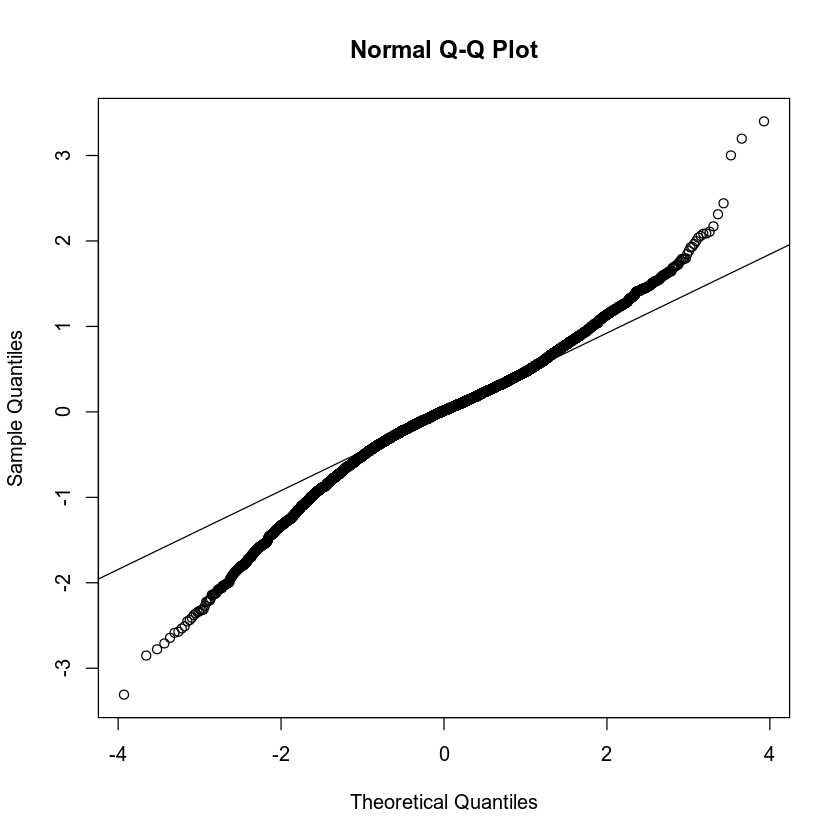

In [28]:
m <- MASS::rlm(t_delay_rate~ covid+arr_flights_n+ATL+ORD+CLT+DEN+ADK+LAX+ITO+MSP+DTW+PHX+sep+mar+CDB+oct+jul+feb
               +extra_tue+EKO+LIH+HIB+BTM+HNL+KOA+apr+may+extra_sat+BJI+extra_thu+OGG+OTZ
               +BQN+LWS+PIH+ELM+ABR+jan,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))
m4 <- m

In [29]:
write.csv(coef(summary(m)),file="data/airport_x_months_fit4.csv")

In [30]:
# PHX, LAX, ORD, DEN


Call: rlm(formula = t_delay_rate ~ covid + arr_flights_n + ATL + CLT + 
    ADK + ITO + MSP + DTW + sep + mar + CDB + oct + jul + feb + 
    extra_tue + EKO + LIH + HIB + BTM + HNL + KOA + apr + may + 
    extra_sat + BJI + extra_thu + OGG + OTZ + BQN + LWS + PIH + 
    ELM + ABR + jan, data = data[newFilterTest, ])
Residuals:
    Min      1Q  Median      3Q     Max 
-3.3091 -0.3122  0.0157  0.3097  3.3973 

Coefficients:
              Value    Std. Error t value 
(Intercept)    -1.6488   0.0166   -99.2385
covid          -0.6812   0.0097   -70.3720
arr_flights_n   0.5050   0.0597     8.4598
ATL            -0.6311   0.0981    -6.4314
CLT            -0.3537   0.0926    -3.8198
ADK             1.6159   0.1136    14.2289
ITO            -1.2127   0.0893   -13.5822
MSP            -0.4166   0.0905    -4.6016
DTW            -0.3804   0.0906    -4.1984
sep            -0.4349   0.0222   -19.5603
mar            -0.2858   0.0171   -16.7160
CDB             1.4067   0.1344    10.4675
oct           

[1] "BIC="             "20458.0001157264"
[1] "AIC="             "20192.8373184966"


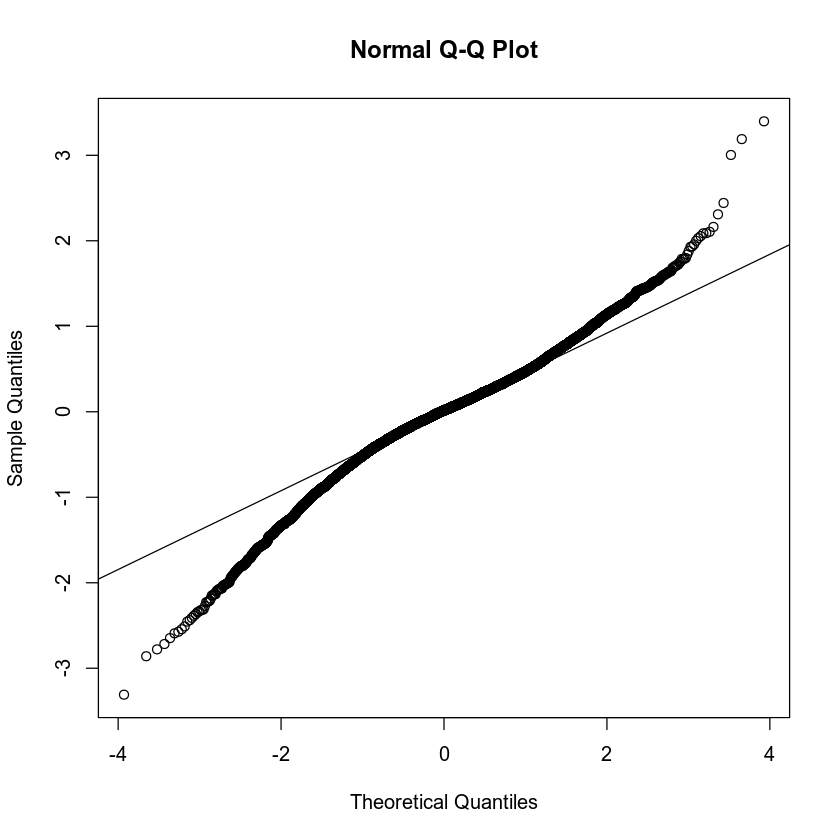

In [34]:
m <- MASS::rlm(t_delay_rate~ covid+arr_flights_n+ATL+CLT+ADK+ITO+MSP+DTW+sep+mar+CDB+oct+jul+feb
               +extra_tue+EKO+LIH+HIB+BTM+HNL+KOA+apr+may+extra_sat+BJI+extra_thu+OGG+OTZ
               +BQN+LWS+PIH+ELM+ABR+jan,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))
m5 <- m

In [35]:
write.csv(coef(summary(m)),file="data/airport_x_months_fit5.csv")

In [36]:
# MSP, DTW, CLT


Call: rlm(formula = t_delay_rate ~ covid + arr_flights_n + ATL + ADK + 
    ITO + sep + mar + CDB + oct + jul + feb + extra_tue + EKO + 
    LIH + HIB + BTM + HNL + KOA + apr + may + extra_sat + BJI + 
    extra_thu + OGG + OTZ + BQN + LWS + PIH + ELM + ABR + jan, 
    data = data[newFilterTest, ])
Residuals:
     Min       1Q   Median       3Q      Max 
-3.30625 -0.31434  0.01547  0.31154  3.39773 

Coefficients:
              Value    Std. Error t value 
(Intercept)    -1.6455   0.0167   -98.6565
covid          -0.6844   0.0097   -70.4533
arr_flights_n   0.3589   0.0563     6.3742
ATL            -0.5260   0.0975    -5.3955
ADK             1.6143   0.1140    14.1553
ITO            -1.2121   0.0897   -13.5193
sep            -0.4357   0.0223   -19.5119
mar            -0.2847   0.0172   -16.5815
CDB             1.4066   0.1350    10.4224
oct            -0.3377   0.0227   -14.8809
jul             0.1723   0.0169    10.2101
feb             0.4054   0.0253    16.0511
extra_tue       0.2251

[1] "BIC="             "20470.8720429647"
[1] "AIC="             "20227.8061455041"


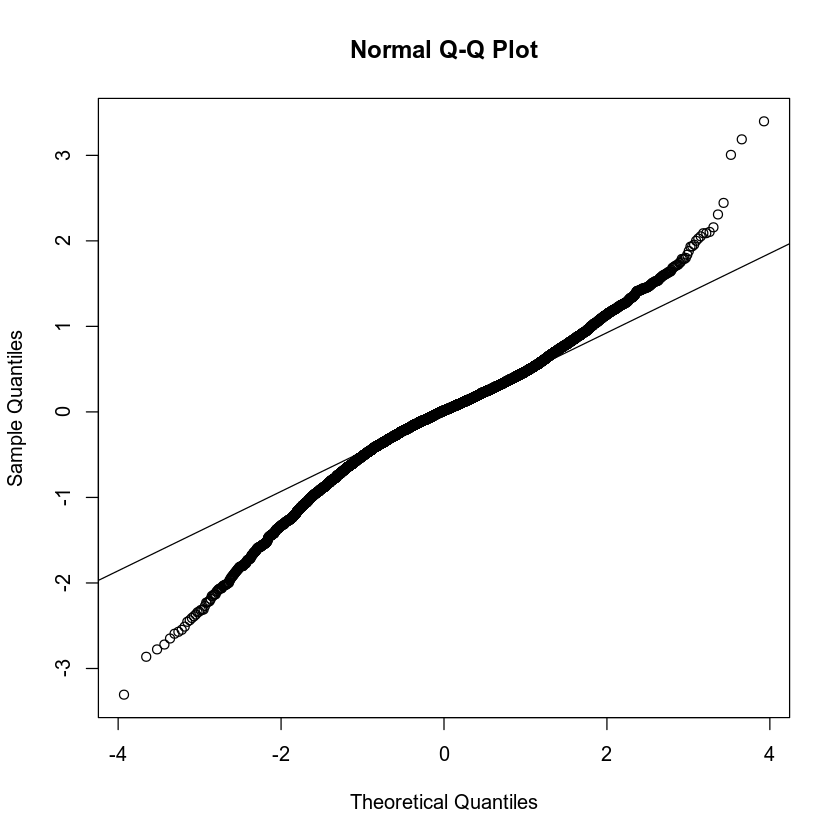

In [37]:
m <- MASS::rlm(t_delay_rate~ covid+arr_flights_n+ATL+ADK+ITO+sep+mar+CDB+oct+jul+feb
               +extra_tue+EKO+LIH+HIB+BTM+HNL+KOA+apr+may+extra_sat+BJI+extra_thu+OGG+OTZ
               +BQN+LWS+PIH+ELM+ABR+jan,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))
m6 <- m

In [40]:
write.csv(coef(summary(m)),file="data/airport_x_months_fit6.csv") # none with |t|<5 are left

In [41]:
# adding top30 indicator (could not be added to the maximal model, because it is the sum of 30 indicators)


Call: rlm(formula = t_delay_rate ~ covid + arr_flights_n + top30 + 
    ATL + ADK + ITO + sep + mar + CDB + oct + jul + feb + extra_tue + 
    EKO + LIH + HIB + BTM + HNL + KOA + apr + may + extra_sat + 
    BJI + extra_thu + OGG + OTZ + BQN + LWS + PIH + ELM + ABR + 
    jan, data = data[newFilterTest, ])
Residuals:
     Min       1Q   Median       3Q      Max 
-3.31850 -0.31251  0.01339  0.31014  3.39541 

Coefficients:
              Value    Std. Error t value 
(Intercept)    -1.6560   0.0166   -99.7642
covid          -0.6684   0.0097   -68.6088
arr_flights_n   1.2354   0.0963    12.8273
top30          -0.3441   0.0303   -11.3735
ATL            -0.8089   0.1002    -8.0715
ADK             1.6141   0.1133    14.2406
ITO            -1.2188   0.0891   -13.6767
sep            -0.4329   0.0222   -19.5061
mar            -0.2907   0.0171   -17.0260
CDB             1.4017   0.1341    10.4503
oct            -0.3376   0.0226   -14.9671
jul             0.1690   0.0168    10.0770
feb           

[1] "BIC="             "20361.2790367829"
[1] "AIC="             "20110.8475060659"


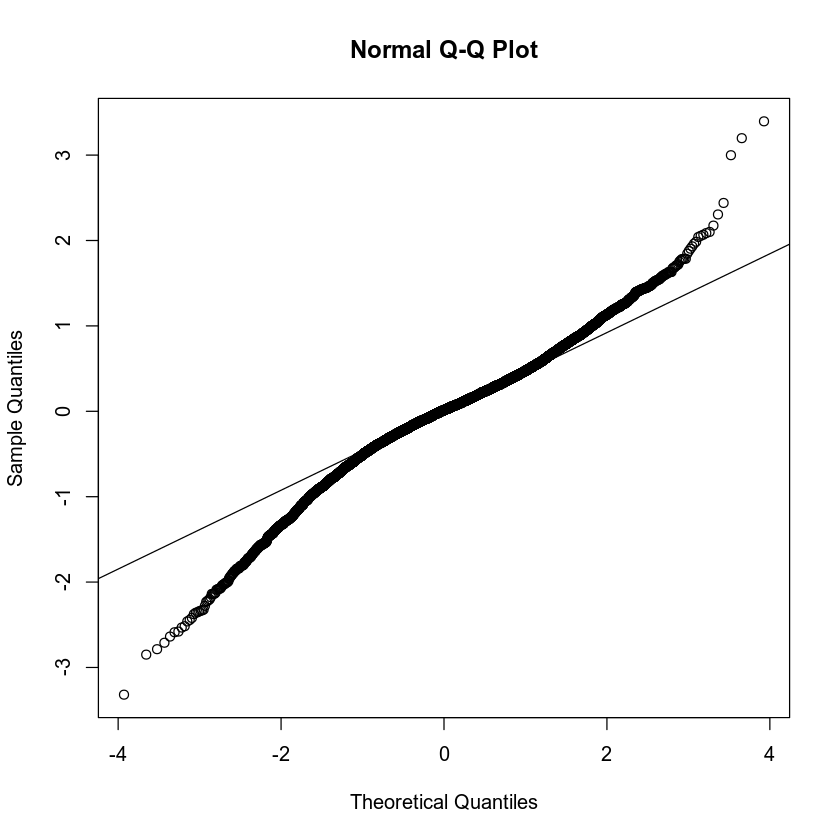

In [43]:
m <- MASS::rlm(t_delay_rate~ covid+arr_flights_n+top30+ATL+ADK+ITO+sep+mar+CDB+oct+jul+feb
               +extra_tue+EKO+LIH+HIB+BTM+HNL+KOA+apr+may+extra_sat+BJI+extra_thu+OGG+OTZ
               +BQN+LWS+PIH+ELM+ABR+jan,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))
m7 <- m

In [44]:
write.csv(coef(summary(m)),file="data/airport_x_months_fit7.csv") 

In [45]:
# HNL has to go


Call: rlm(formula = t_delay_rate ~ covid + arr_flights_n + top30 + 
    ATL + ADK + ITO + sep + mar + CDB + oct + jul + feb + extra_tue + 
    EKO + LIH + HIB + BTM + KOA + apr + may + extra_sat + BJI + 
    extra_thu + OGG + OTZ + BQN + LWS + PIH + ELM + ABR + jan, 
    data = data[newFilterTest, ])
Residuals:
     Min       1Q   Median       3Q      Max 
-3.31828 -0.31375  0.01301  0.31034  3.39584 

Coefficients:
              Value    Std. Error t value 
(Intercept)    -1.6571   0.0166   -99.8531
covid          -0.6676   0.0097   -68.5522
arr_flights_n   1.2814   0.0946    13.5476
top30          -0.3636   0.0293   -12.4266
ATL            -0.8216   0.1001    -8.2087
ADK             1.6141   0.1134    14.2396
ITO            -1.2183   0.0891   -13.6705
sep            -0.4329   0.0222   -19.5043
mar            -0.2911   0.0171   -17.0514
CDB             1.4020   0.1341    10.4522
oct            -0.3378   0.0226   -14.9726
jul             0.1688   0.0168    10.0632
feb             0.41

[1] "BIC="             "20354.5895350872"
[1] "AIC="             "20111.5236376266"


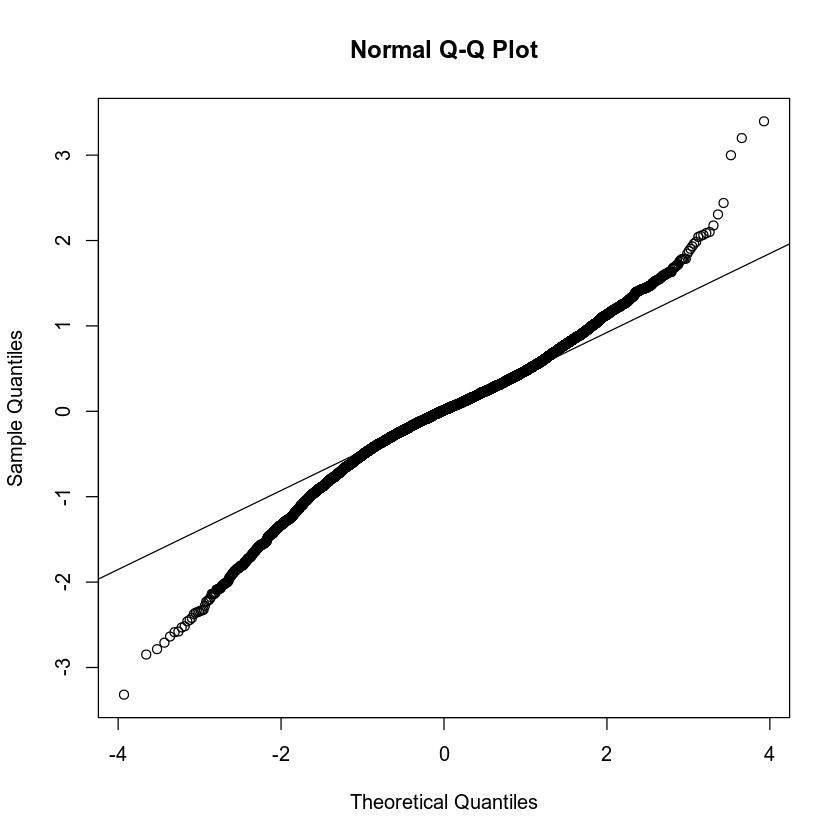

In [46]:
m <- MASS::rlm(t_delay_rate~ covid+arr_flights_n+top30+ATL+ADK+ITO+sep+mar+CDB+oct+jul+feb
               +extra_tue+EKO+LIH+HIB+BTM+KOA+apr+may+extra_sat+BJI+extra_thu+OGG+OTZ
               +BQN+LWS+PIH+ELM+ABR+jan,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))
m8 <- m

In [47]:
write.csv(coef(summary(m8)),file="data/airport_x_months_intermediate.csv") 
### INTERMEDIATE CHECKPOINT: done using t-value for selection


Call: rlm(formula = t_delay_rate ~ covid + arr_flights_n + top30 + 
    jan + feb + mar + apr + may + jul + sep + oct + extra_tue + 
    extra_thu + extra_sat + ADK + ATL + ITO + CDB + EKO + LIH + 
    HIB + BTM + KOA + BJI + OGG + OTZ + BQN + LWS + PIH + ELM + 
    ABR, data = data[newFilterTest, ])
Residuals:
     Min       1Q   Median       3Q      Max 
-3.31828 -0.31375  0.01301  0.31034  3.39584 

Coefficients:
              Value    Std. Error t value 
(Intercept)    -1.6571   0.0166   -99.8531
covid          -0.6676   0.0097   -68.5522
arr_flights_n   1.2814   0.0946    13.5476
top30          -0.3636   0.0293   -12.4266
jan            -0.2109   0.0225    -9.3927
feb             0.4105   0.0251    16.3522
mar            -0.2911   0.0171   -17.0514
apr            -0.2902   0.0179   -16.2120
may            -0.2241   0.0170   -13.2086
jul             0.1688   0.0168    10.0632
sep            -0.4329   0.0222   -19.5043
oct            -0.3378   0.0226   -14.9726
extra_tue       0.22

[1] "BIC="             "20354.5895350872"
[1] "AIC="             "20111.5236376266"


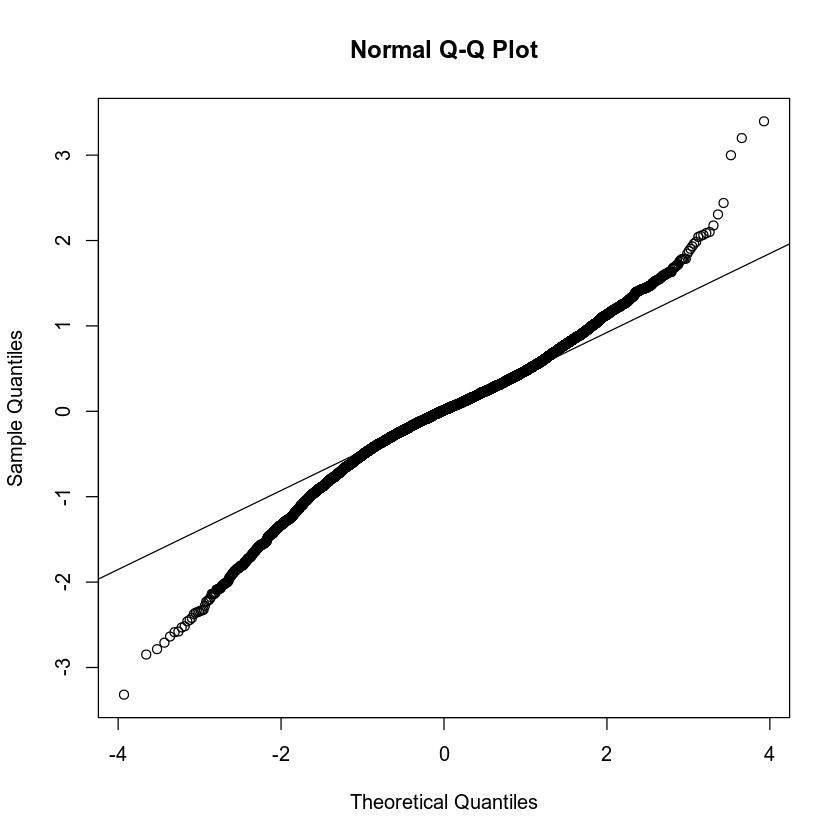

In [48]:
m <- MASS::rlm(t_delay_rate~ 
               covid
               +arr_flights_n
               +top30
               +jan
               +feb
               +mar
               +apr
               +may
               +jul
               +sep
               +oct
               +extra_tue
               +extra_thu
               +extra_sat
               
               +ADK
               +ATL
               +ITO
               +CDB
               +EKO
               +LIH
               +HIB
               +BTM
               +KOA
               +BJI
               +OGG
               +OTZ
               +BQN
               +LWS
               +PIH
               +ELM
               +ABR
               ,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))
intermediate <- m


Call: rlm(formula = t_delay_rate ~ covid + arr_flights_n + top30 + 
    jan + feb + mar + apr + may + jul + sep + oct + extra_tue + 
    extra_thu + extra_sat + ADK + ATL + ITO + CDB + EKO + LIH + 
    HIB + BTM + KOA + BJI + OGG + OTZ + BQN + LWS + PIH + ELM + 
    ABR, data = data[newFilterTest, ])
Residuals:
     Min       1Q   Median       3Q      Max 
-3.31828 -0.31375  0.01301  0.31034  3.39584 

Coefficients:
              Value    Std. Error t value 
(Intercept)    -1.6571   0.0166   -99.8531
covid          -0.6676   0.0097   -68.5522
arr_flights_n   1.2814   0.0946    13.5476
top30          -0.3636   0.0293   -12.4266
jan            -0.2109   0.0225    -9.3927
feb             0.4105   0.0251    16.3522
mar            -0.2911   0.0171   -17.0514
apr            -0.2902   0.0179   -16.2120
may            -0.2241   0.0170   -13.2086
jul             0.1688   0.0168    10.0632
sep            -0.4329   0.0222   -19.5043
oct            -0.3378   0.0226   -14.9726
extra_tue       0.22

[1] "BIC="             "20354.5895350872"
[1] "AIC="             "20111.5236376266"


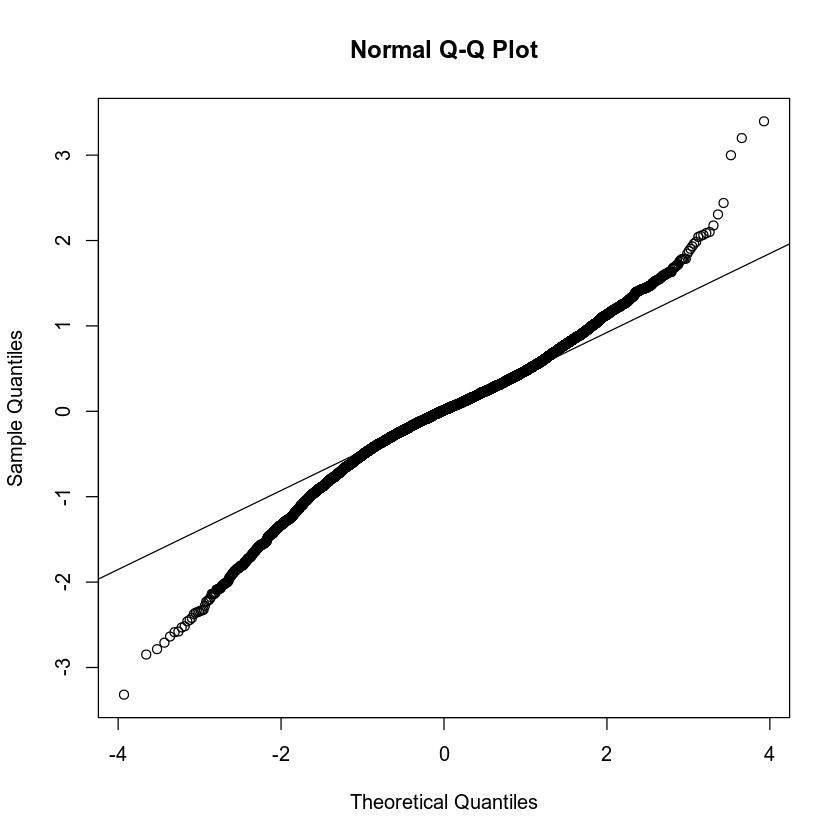

In [54]:
m <- MASS::rlm(t_delay_rate~ 
               
               
               covid
               
               +arr_flights_n
               +top30
               +jan
               +feb
               +mar
               +apr
               +may
               +jul
               +sep
               +oct
               +extra_tue
               +extra_thu
               +extra_sat
               
               +ADK
               +ATL
               +ITO
               +CDB
               +EKO
               +LIH
               +HIB
               +BTM
               +KOA
               +BJI
               +OGG
               +OTZ
               +BQN
               +LWS
               +PIH
               +ELM
               +ABR
               ,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


In [55]:
c(BIC(m1),BIC(m2),BIC(m3),BIC(m4),BIC(m5),BIC(m6),BIC(m7),BIC(m8))

[1] 20266.74 20417.11 20445.08 20454.14 20458.00 20470.87 20361.28 20354.59

In [57]:
### airport effect estimates

m <- intermediate

In [60]:
m

Call:
rlm(formula = t_delay_rate ~ covid + arr_flights_n + top30 + 
    jan + feb + mar + apr + may + jul + sep + oct + extra_tue + 
    extra_thu + extra_sat + ADK + ATL + ITO + CDB + EKO + LIH + 
    HIB + BTM + KOA + BJI + OGG + OTZ + BQN + LWS + PIH + ELM + 
    ABR, data = data[newFilterTest, ])
Converged in 6 iterations

Coefficients:
  (Intercept)         covid arr_flights_n         top30           jan 
   -1.6571043    -0.6675954     1.2814442    -0.3636020    -0.2108848 
          feb           mar           apr           may           jul 
    0.4105046    -0.2911106    -0.2901765    -0.2241316     0.1687925 
          sep           oct     extra_tue     extra_thu     extra_sat 
   -0.4329043    -0.3377728     0.2238082     0.1260413     0.2430634 
          ADK           ATL           ITO           CDB           EKO 
    1.6140854    -0.8216337    -1.2182870     1.4020341    -0.9125899 
          LIH           HIB           BTM           KOA           BJI 
   -0.8199475    -

In [59]:
# we do it in python...S

,t,month,year,airport_name,airport,covid,control,extra_mon,extra_tue,extra_wed,⋯,jul,aug,sep,oct,nov,dec,arr_flights_n,t_delay_rate,t_new_delay_rate,tc_delay_rate
,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
51461,178,3,2018,"Aberdeen, SD: Aberdeen Regional",ABR,0,1,0,0,0,⋯,0,0,0,0,0,0,0.0016212965,-2.6741486,-3.2949752,-2.6741486
51462,178,3,2018,"Abilene, TX: Abilene Regional",ABI,0,1,0,0,0,⋯,0,0,0,0,0,0,0.0037917418,-1.3862944,-1.9023058,-1.3862944
51463,178,3,2018,"Adak Island, AK: Adak",ADK,0,1,0,0,0,⋯,0,0,0,0,0,0,0.0002353495,-0.6931472,-0.6931472,-0.6931472
51464,178,3,2018,"Aguadilla, PR: Rafael Hernandez",BQN,0,1,0,0,0,⋯,0,0,0,0,0,0,0.0037917418,-0.9998774,-1.5358017,-0.9998774
51465,178,3,2018,"Akron, OH: Akron-Canton Regional",CAK,0,1,0,0,0,⋯,0,0,0,0,0,0,0.0166313642,-1.1582044,-1.6464792,-1.1582044
51466,178,3,2018,"Albany, GA: Southwest Georgia Regional",ABY,0,1,0,0,0,⋯,0,0,0,0,0,0,0.0023011951,-1.9459101,-2.1566312,-1.9459101
51467,178,3,2018,"Albany, NY: Albany International",ALB,0,1,0,0,0,⋯,0,0,0,0,0,0,0.0314322324,-1.3728296,-1.8029164,-1.3728296
51468,178,3,2018,"Albuquerque, NM: Albuquerque International Sunport",ABQ,0,1,0,0,0,⋯,0,0,0,0,0,0,0.0494495437,-1.4271164,-2.0563912,-1.4271164
51469,178,3,2018,"Alexandria, LA: Alexandria International",AEX,0,1,0,0,0,⋯,0,0,0,0,0,0,0.0076619335,-1.7332633,-2.2570513,-1.7332633



Call: rlm(formula = t_delay_rate ~ covid + arr_flights_n + jan + feb + 
    mar + apr + may + jul + sep + oct + extra_tue + extra_thu + 
    extra_sat + ADK + ATL + ITO + CDB + EKO + LIH + HIB + BTM + 
    KOA + BJI + OGG + OTZ + BQN + LWS + PIH + ELM + ABR, data = data[newFilterTest, 
    ])
Residuals:
     Min       1Q   Median       3Q      Max 
-3.30446 -0.31535  0.01633  0.31197  3.39853 

Coefficients:
              Value    Std. Error t value 
(Intercept)    -1.6465   0.0167   -98.5074
covid          -0.6846   0.0097   -70.3236
arr_flights_n   0.3503   0.0564     6.2115
jan            -0.2134   0.0226    -9.4282
feb             0.4053   0.0253    16.0146
mar            -0.2850   0.0172   -16.5652
apr            -0.2894   0.0180   -16.0381
may            -0.2231   0.0171   -13.0404
jul             0.1725   0.0169    10.2024
sep            -0.4363   0.0224   -19.4951
oct            -0.3377   0.0227   -14.8462
extra_tue       0.2253   0.0163    13.8422
extra_thu       0.1260   0.0

[1] "BIC="             "20483.1851333957"
[1] "AIC="             "20247.4848691915"


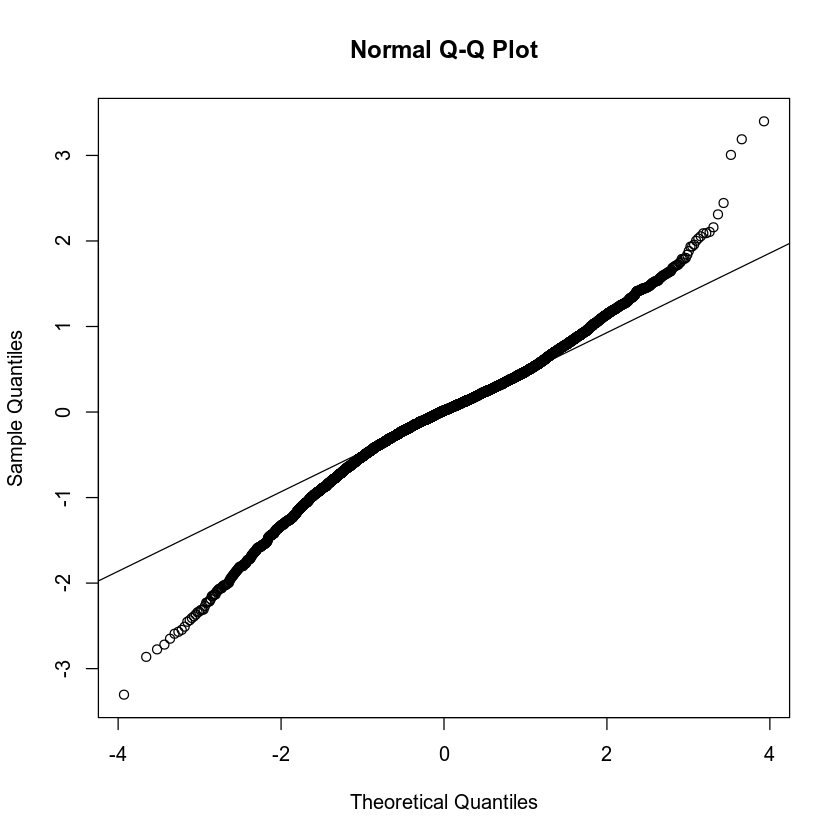

In [62]:
m <- MASS::rlm(t_delay_rate~ 
               covid
               +arr_flights_n
     
               +jan
               +feb
               +mar
               +apr
               +may
               +jul
               +sep
               +oct
               +extra_tue
               +extra_thu
               +extra_sat
               
               +ADK
               +ATL
               +ITO
               +CDB
               +EKO
               +LIH
               +HIB
               +BTM
               +KOA
               +BJI
               +OGG
               +OTZ
               +BQN
               +LWS
               +PIH
               +ELM
               +ABR
               ,data=data[newFilterTest,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))
intermediate_noTop30 <- m

In [63]:
write.csv(coef(summary(intermediate_noTop30)),file="data/airport_x_months_intermediate_no_top30.csv") 

In [64]:
write.csv(coef(summary(intermediate)),file="data/airport_x_months_intermediate2.csv") 

In [ ]:
# checking time effects


Call: rlm(formula = t_delay_rate ~ jan + feb + mar + apr + may + jun + 
    jul + aug + sep + oct + nov + extra_mon + extra_tue + extra_wed + 
    extra_thu + extra_fri + extra_sat + extra_sun + ITO, data = data[finiteFilter & 
    data$year < 2020 & data$year > 2003, ])
Residuals:
     Min       1Q   Median       3Q      Max 
-3.56666 -0.29392  0.01692  0.29427  3.44751 

Coefficients:
            Value    Std. Error t value 
(Intercept)  -0.8465   0.0501   -16.8980
jan          -0.1803   0.0099   -18.2493
feb          -0.5431   0.0468   -11.6078
mar          -0.2916   0.0099   -29.5816
apr          -0.5503   0.0193   -28.5179
may          -0.3625   0.0099   -36.6943
jun          -0.1632   0.0192    -8.4815
jul          -0.0619   0.0098    -6.2981
aug          -0.1856   0.0098   -18.8906
sep          -0.7113   0.0193   -36.9491
oct          -0.5056   0.0099   -51.2720
nov          -0.6330   0.0193   -32.8221
extra_mon    -0.1238   0.0172    -7.2015
extra_tue    -0.1125   0.0180    -6

[1] "BIC="             "91967.1376307043"
[1] "AIC="             "91779.2504233316"


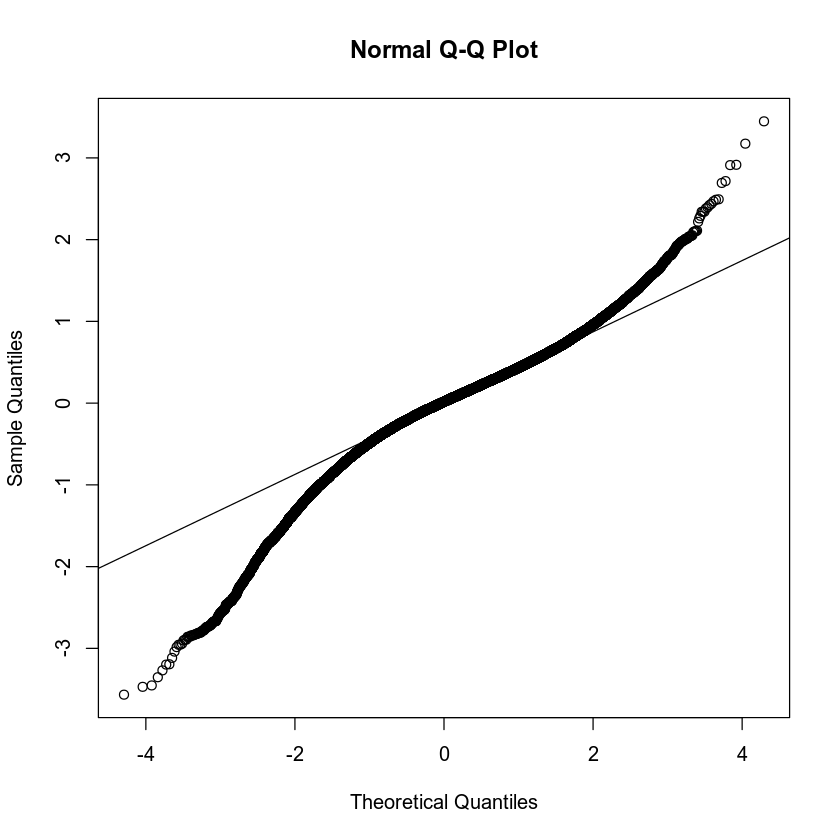

In [81]:
m <- MASS::rlm(t_delay_rate~ 
               
               
               jan
               +feb
               +mar
               +apr
               +may
               +jun
               +jul
               +aug
               +sep
               +oct
               +nov
               +extra_mon
               +extra_tue
               +extra_wed
               +extra_thu
               +extra_fri
               +extra_sat
               +extra_sun
               +ITO
             
               ,data=data[finiteFilter&data$year<2020&data$year>2003,])
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))


In [78]:
write.csv(coef(summary(m)),file="data/time_effect_model.csv") 

In [88]:
data["arr_flights_n2"] = data$arr_flights_n ^2
data["arr_flights_n3"] = data$arr_flights_n ^3
data["arr_flights_n_sqrt"] = data$arr_flights_n ^0.5

In [103]:
data["arr_flights_n_log"] = log(data$arr_flights_n)

In [136]:
data["arr_flights_n_root"] = data$arr_flights_n ^0.54

[1] "BIC="             "20284.9871455485"
[1] "AIC="             "20041.9212480879"



Call: rlm(formula = t_delay_rate ~ covid + arr_flights_n_sqrt + top30 + 
    jan + feb + mar + apr + may + jul + sep + oct + extra_tue + 
    extra_thu + extra_sat + ADK + ATL + ITO + CDB + EKO + LIH + 
    HIB + BTM + KOA + BJI + OGG + OTZ + BQN + LWS + PIH + ELM + 
    ABR, data = data[newFilterTest, ])
Residuals:
      Min        1Q    Median        3Q       Max 
-3.323094 -0.313833  0.007141  0.309717  3.450324 

Coefficients:
                   Value    Std. Error t value 
(Intercept)         -1.7406   0.0176   -98.9725
covid               -0.6581   0.0097   -67.7903
arr_flights_n_sqrt   0.9602   0.0584    16.4537
top30               -0.4169   0.0288   -14.4725
jan                 -0.2125   0.0224    -9.5046
feb                  0.4128   0.0250    16.5146
mar                 -0.2970   0.0170   -17.4677
apr                 -0.2898   0.0178   -16.2598
may                 -0.2252   0.0169   -13.3271
jul                  0.1692   0.0167    10.1291
sep                 -0.4349   0.0221

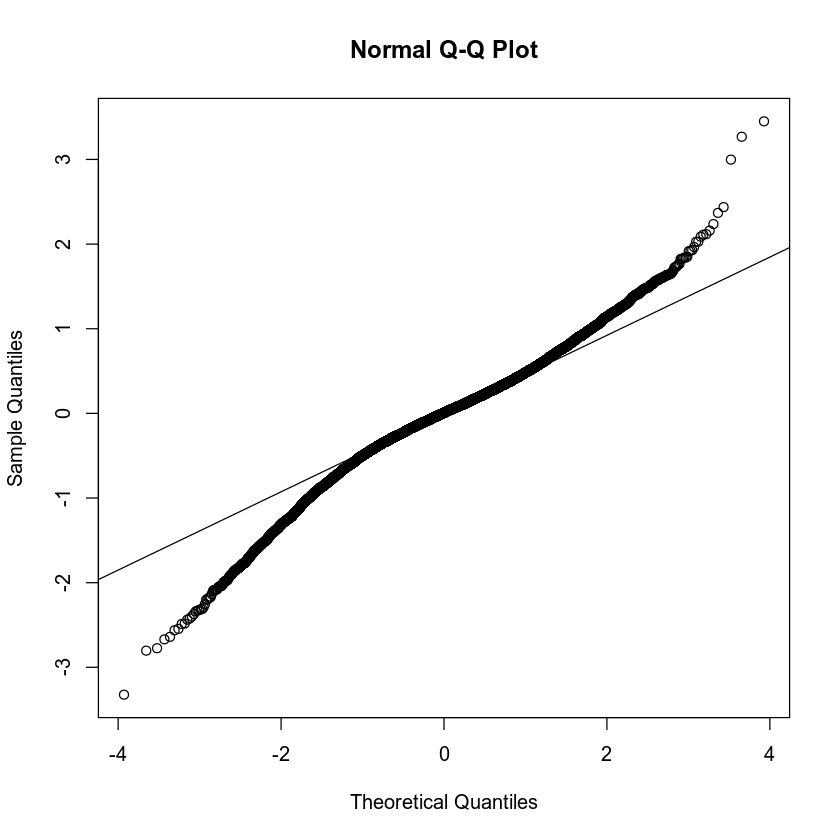

In [146]:
m <- MASS::rlm(t_delay_rate~ 
               covid
               +arr_flights_n_sqrt
               +top30
               +jan
               +feb
               +mar
               +apr
               +may
               +jul
               +sep
               +oct
               +extra_tue
               +extra_thu
               +extra_sat
               
               +ADK
               +ATL
               +ITO
               +CDB
               +EKO
               +LIH
               +HIB
               +BTM
               +KOA
               +BJI
               +OGG
               +OTZ
               +BQN
               +LWS
               +PIH
               +ELM
               +ABR
               ,data=data[newFilterTest,])
print(c("BIC=",BIC(m)))
print(c("AIC=",AIC(m)))
summary(m)
qqnorm(m$residuals); qqline(m$residuals)

sqr_model <- m

In [147]:
write.csv(coef(summary(sqr_model)),file="data/sqrt_model.csv") 